<a href="https://colab.research.google.com/github/dong-uk-kim97/Exploration/blob/main/Exploration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12번 노드 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

1.데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes = load_diabetes()
df_X= diabetes.data
df_y = diabetes.target


In [3]:
df_X.shape

(442, 10)

In [4]:
df_y.shape

(442,)

2.모델에 입력할 데이터 X 준비하기

In [5]:
df_X = np.array(df_X)
df_X.shape

(442, 10)

In [6]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
diabetes_df['bmi']

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64

3.모델에 입력할 데이터 y 준비하기

In [9]:
df_y = np.array(df_y)
df_y.shape

(442,)

4.train 데이터와 test데이터로 분리하기

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=40)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## 모델 준비하기

In [11]:
w = np.random.rand(10)
b = np.random.rand()

In [12]:
w

array([0.80042121, 0.00475972, 0.5735595 , 0.95355598, 0.2564649 ,
       0.95446005, 0.71738537, 0.30324537, 0.45198837, 0.75718426])

In [13]:
b

0.2755568418703296

In [14]:
def model(X,w,b):
  predictions = 0
  for i in range(10):
    predictions += X[:, i]*w[i]
  predictions +=b
  return predictions

## 손실함수 loss 정의하기

In [15]:
def MSE(a,b):
  mse= ((a-b)**2).mean()
  return mse

MSE를 우선적으로 정의한다.

In [16]:
def loss(X,w,b,y):
  predictions = model(X,w,b)
  L = MSE(predictions, y)
  return L

그 다음 손실함수 loss를 정의한다.

## 기울기를 구하는 gradient 함수 구하기

In [17]:
def gradient(X,w,b,y):
  # N은 가중치의 개수
  N = len(w)

  # y_pred 준비
  y_pred = model(X,w,b)
  
  # 공식에 맞게 gradient 계산
  dw =1/N * 2*X.T.dot(y_pred - y)

  # b의 gradient 계산
  db = 2*(y_pred - y).mean()
  return dw,db

In [18]:
dw, db = gradient(df_X,w,b,df_y)
print('dw:',dw)
print('db:',db)

dw: [ -60.46422638  -13.81836874 -189.53288971 -142.52580103  -68.17567045
  -55.93483725  127.72684111 -139.01956057 -182.82976995 -123.42536166]
db: -303.7158546420512


8.하이퍼 파라미터인 학습률 설정하기

학습률 설정하기

In [19]:
learning_rate = 0.2

In [20]:
losses = []

for i in range(1,2001):
  dw, db = gradient(X_train, w, b, y_train)
  w -= learning_rate *dw
  b -= learning_rate*db
  L = loss(X_train, w, b, y_train)
  losses.append(L)
  if i%10 ==0:
    print('Iteration %d : Loss %0.4f'%(i,L))

Iteration 10 : Loss 3414.2889
Iteration 20 : Loss 2977.2496
Iteration 30 : Loss 2800.4597
Iteration 40 : Loss 2709.7695
Iteration 50 : Loss 2660.5566
Iteration 60 : Loss 2633.0511
Iteration 70 : Loss 2617.2744
Iteration 80 : Loss 2607.9858
Iteration 90 : Loss 2602.3631
Iteration 100 : Loss 2598.8537
Iteration 110 : Loss 2596.5869
Iteration 120 : Loss 2595.0655
Iteration 130 : Loss 2594.0003
Iteration 140 : Loss 2593.2201
Iteration 150 : Loss 2592.6218
Iteration 160 : Loss 2592.1421
Iteration 170 : Loss 2591.7412
Iteration 180 : Loss 2591.3940
Iteration 190 : Loss 2591.0840
Iteration 200 : Loss 2590.8003
Iteration 210 : Loss 2590.5356
Iteration 220 : Loss 2590.2850
Iteration 230 : Loss 2590.0449
Iteration 240 : Loss 2589.8130
Iteration 250 : Loss 2589.5875
Iteration 260 : Loss 2589.3671
Iteration 270 : Loss 2589.1509
Iteration 280 : Loss 2588.9383
Iteration 290 : Loss 2588.7288
Iteration 300 : Loss 2588.5220
Iteration 310 : Loss 2588.3177
Iteration 320 : Loss 2588.1155
Iteration 330 : L

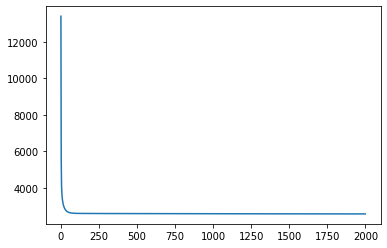

In [21]:
plt.plot(losses)
plt.show()

In [22]:
w,b

(array([  27.70153963, -229.17611954,  564.43634289,  302.05548966,
        -490.25898541,  163.16899153,  -65.54468646,  116.4233334 ,
         670.35873103,   17.09863516]), 150.7935025629089)

In [23]:
prediction = model(X_test, w,b)
mse = loss(X_train, w, b, y_train)
mse

2567.84565482428

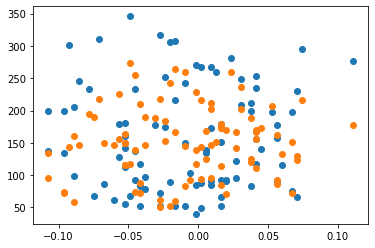

In [24]:
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0],prediction)
plt.show()

# 13번 노드

## 1. 데이터 가져오기

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
train = pd.read_csv('/content/drive/MyDrive/bike sharing demand practice/train (1).csv')

## 2. to_datetime으로 datetime자료형으로 변환하고 년,월,일,시,분,초 6개의 칼럼으로 나누기

In [27]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [28]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [29]:
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [30]:
train['year']=train['datetime'].dt.year

In [31]:
train['month']=train['datetime'].dt.month

In [32]:
train['day']=train['datetime'].dt.day

In [33]:
train['hour']=train['datetime'].dt.hour

In [34]:
train['minute']=train['datetime'].dt.minute

In [35]:
train['second']=train['datetime'].dt.second

## 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

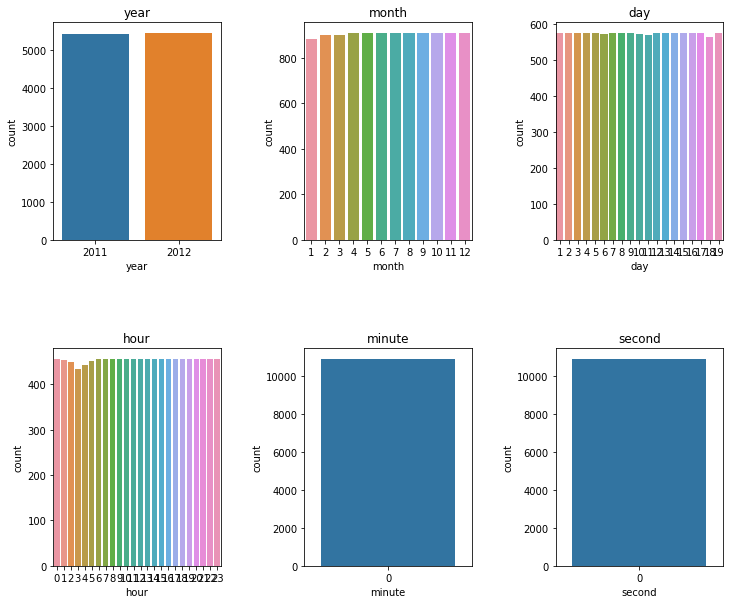

In [36]:
f, ax = plt.subplots(2,3, figsize=(12,10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
sns.countplot(x=train['year'],ax=ax[0,0])
sns.countplot(x=train['month'],ax=ax[0,1])
sns.countplot(x=train['day'], ax=ax[0,2])
sns.countplot(x=train['hour'], ax=ax[1,0])
sns.countplot(x=train['minute'], ax=ax[1,1])
sns.countplot(x=train['second'], ax=ax[1,2])

ax[0,0].set_title('year')
ax[0,1].set_title('month')
ax[0,2].set_title('day')
ax[1,0].set_title('hour')
ax[1,1].set_title('minute')
ax[1,2].set_title('second');

## 4. X,y 컬럼 선택 및 train/test set 데이터 분리하기




In [37]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


4-1 barplot으로 관계성 파악하기

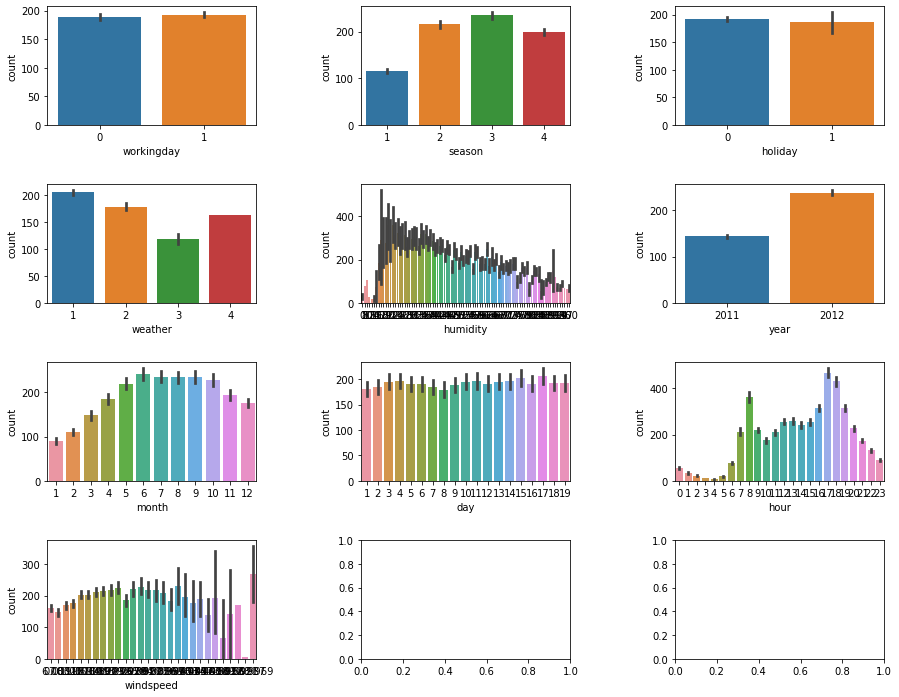

In [38]:
f, axes = plt.subplots(4,3, figsize=(15,12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.barplot(x='workingday',y='count', data=train, ax=axes[0,0])
sns.barplot(x='season', y='count', data=train, ax=axes[0,1])
sns.barplot(x='holiday', y='count',data=train, ax=axes[0,2])
sns.barplot(x='weather', y ='count', data=train, ax=axes[1,0])
sns.barplot(x='humidity',y='count', data=train, ax=axes[1,1])
sns.barplot(x='year',y='count', data=train, ax=axes[1,2])
sns.barplot(x='month',y='count',data=train, ax=axes[2,0])
sns.barplot(x='day',y='count',data=train, ax=axes[2,1])
sns.barplot(x='hour', y='count',data=train, ax=axes[2,2])
sns.barplot(x='windspeed',y='count',data=train, ax=axes[3,0]);

4-2 boxplot으로 관계성 파악하기

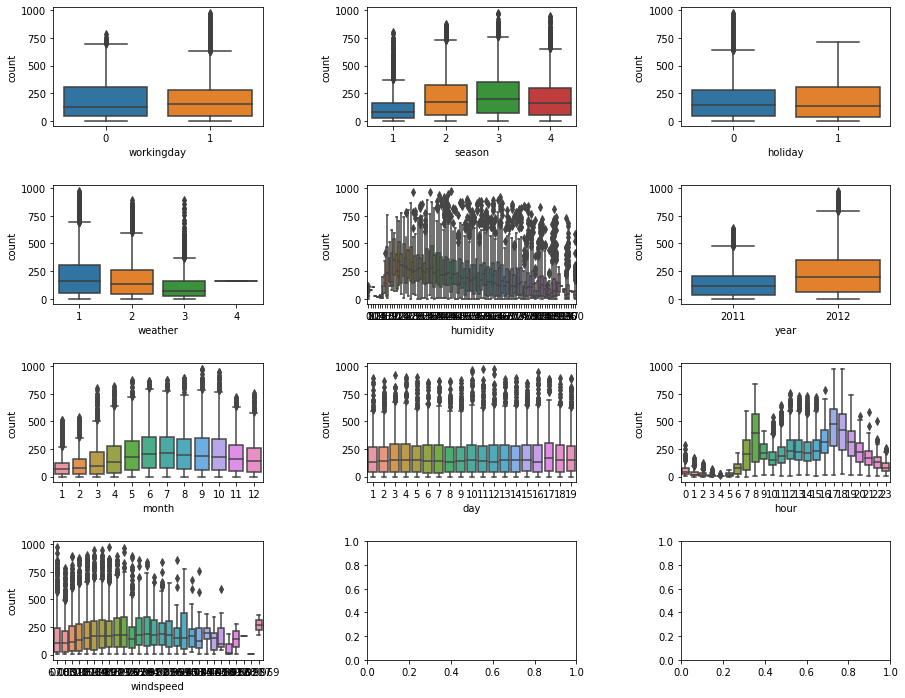

In [39]:
f, axes = plt.subplots(4,3, figsize=(15,12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.boxplot(x='workingday',y='count', data=train, ax=axes[0,0])
sns.boxplot(x='season', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count',data=train, ax=axes[0,2])
sns.boxplot(x='weather', y ='count', data=train, ax=axes[1,0])
sns.boxplot(x='humidity',y='count', data=train, ax=axes[1,1])
sns.boxplot(x='year',y='count', data=train, ax=axes[1,2])
sns.boxplot(x='month',y='count',data=train, ax=axes[2,0])
sns.boxplot(x='day',y='count',data=train, ax=axes[2,1])
sns.boxplot(x='hour', y='count',data=train, ax=axes[2,2])
sns.boxplot(x='windspeed',y='count',data=train, ax=axes[3,0]);

4-3. regplot으로 관계성 파악하기

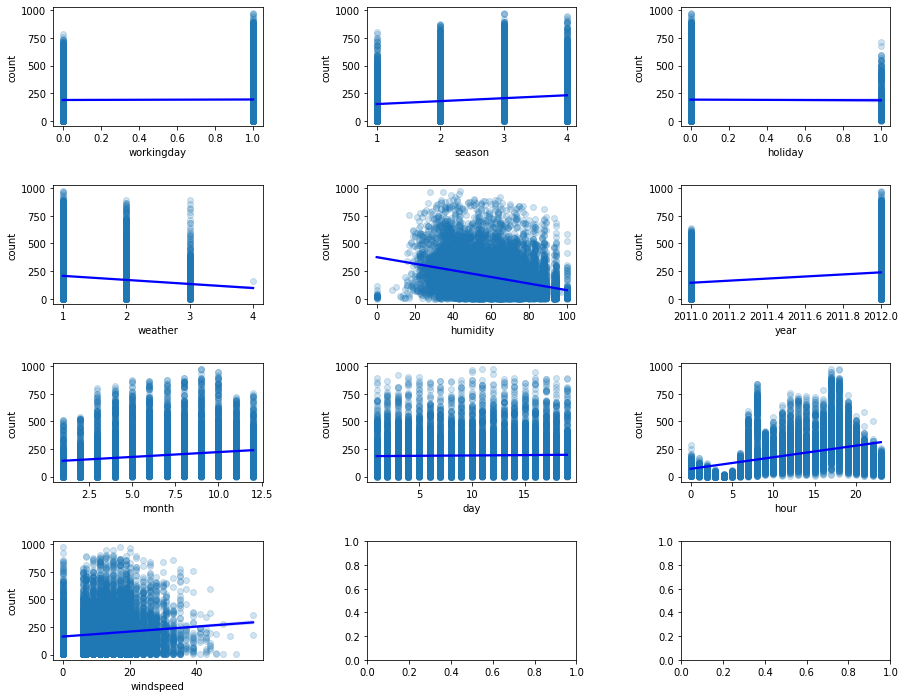

In [40]:
f, axes = plt.subplots(4,3, figsize=(15,12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.regplot(x='workingday',y='count', data=train, ax=axes[0,0],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='season', y='count', data=train, ax=axes[0,1],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='holiday', y='count',data=train, ax=axes[0,2],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='weather', y ='count', data=train, ax=axes[1,0],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity',y='count', data=train, ax=axes[1,1],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='year',y='count', data=train, ax=axes[1,2],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='month',y='count',data=train, ax=axes[2,0],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='day',y='count',data=train, ax=axes[2,1],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='hour', y='count',data=train, ax=axes[2,2],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed',y='count',data=train, ax=axes[3,0],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'});

workingday와 holiday의 추세선이 눈에 띄지 않고 앞서 칼럼을 분리해서 2번에서 본 것처럼 minute과 second은 0만 카운트 되기 때문에 의미가 없다고 생각한다. 그리고 노드에서 나왔던 것처럼 casual, registered도 역시 의미 없다고 생각한다.

In [41]:
train = train[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'year', 'month', 'day', 'hour', 'minute', 'second']]


In [42]:
X = train [['season','weather', 'temp','atemp', 'humidity', 'windspeed','year','month','hour']].values
y = train['count'].values

In [43]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. LinearRegression 모델 학습

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(X_test)
y_pred

array([245.44916755,  55.90681922, 200.99818539, ..., 311.3063591 ,
        40.18233073, 242.13160915])

In [47]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

19951.727504723425

In [48]:
RSME = mse **0.5
RSME

141.25058408630892

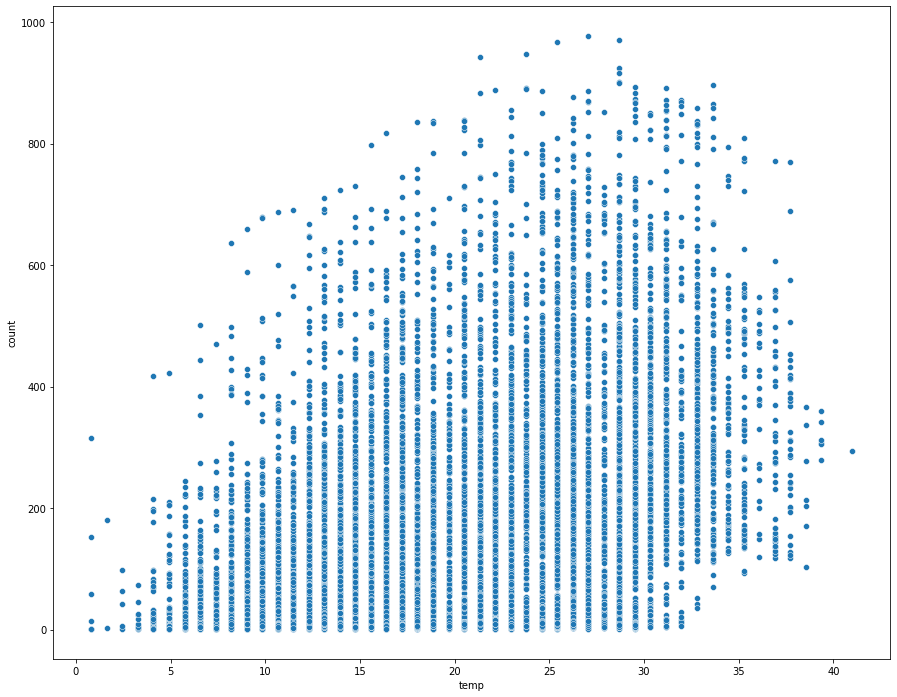

In [49]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=train['temp'],
            y=train['count'])
plt.show()

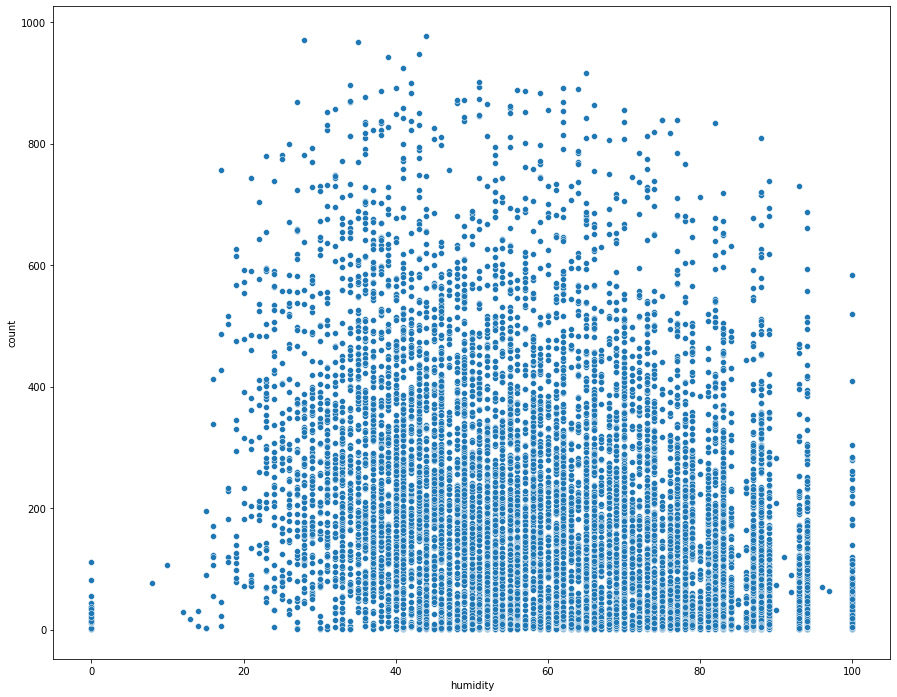

In [50]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=train['humidity'],
            y=train['count'])
plt.show();

# 회고

솔직히 막막했다. 이건 내가 배운 영역이 아니라는 느낌부터 들었다. 그래서 먼저 해결하신 명찬님에게 많은 것을 물어보았다. train과 test를 나누는 데에서 숫자가 맞지 않았다. 명찬님은 4시간 동안 고민하신 것을 쏙 빼 먹는 느낌이라 기분이 좋지 않다. 다음에는 내가 쏙 빼먹을 수 있게 먼저 완성하고 싶다. 

이 노드를 통해서 matplotlib에 대한 이론만을 알고 있었는데 실제로 써보면서 왜 이렇게 되는지를 알게 되었다. 그리고 애매하게만 알던 것을 직접 찾아보면서 적용해보니까 명확하게 알게 된 느낌이 들었다.

아 그리고 세번째 노드 시작 전에 이걸 끝내서 무지 기분이 좋다. 이제 DeepML 발표 준비나 해야겠다.

# 자료 출처

plot 사용법 출처 https://coding-kindergarten.tistory.com/132

캐글 필사 https://www.kaggle.com/code/hwangmuseong/bike-sharing-demand-practice-for-aiffel

seaborn 공식 홈페이지http://seaborn.pydata.org/index.html

김명찬님 노드 참고 https://github.com/myukimm/EXPLORATION/tree/main/ex02